#### 2. Ridge and Lasso

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso			
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df= load_breast_cancer()
X=pd.DataFrame(df.data)
y = df.target
ridge_regression = Ridge()
lasso_regression = Lasso()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [4]:
parametes= {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 20 ,30 , 20 , 40 , 50, 60, 70, 80, 90] }
ridge_cv = GridSearchCV( ridge_regression, parametes, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 20, 30, 20, 40, 50,
                                   60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [5]:
ridge_pred = ridge_cv.predict(X_test)
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 1}
-0.0675231724418286


<Axes: ylabel='Count'>

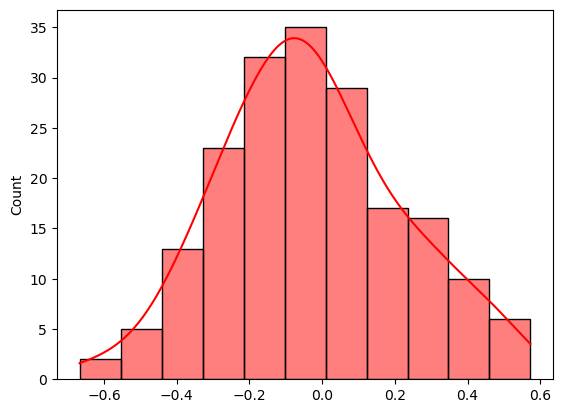

In [6]:

sns.histplot(ridge_pred-y_test, color='red', kde=True)

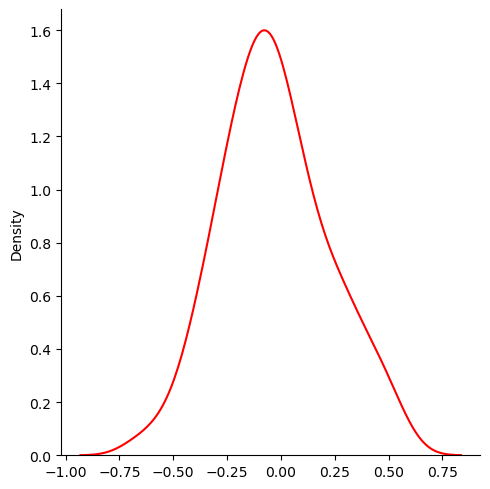

In [7]:
sns.displot(ridge_pred - y_test, kind='kde', color='red')

In [8]:
score= r2_score(y_test, ridge_pred)
score

0.7242681870550053